<a href="https://colab.research.google.com/github/SahilPatelMNNIT/-Sahil-srep/blob/master/Imageclasstrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import data
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)= cifar10.load_data() 

In [0]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
print("x_train shape=" , x_train.shape)
print("y_train shape=" , y_train.shape)
print("x_test shape=" , x_test.shape)
print("y_test shape=" , y_test.shape)

x_train shape= (50000, 32, 32, 3)
y_train shape= (50000, 1)
x_test shape= (10000, 32, 32, 3)
y_test shape= (10000, 1)


In [0]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

[9]


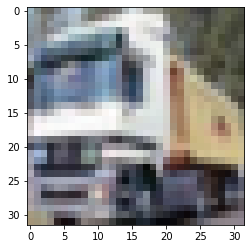

In [0]:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[1])
print(y_train[1])

In [0]:
from keras.utils import to_categorical
y_rtrain=to_categorical(y_train)
y_rtest=to_categorical(y_test)

  

In [0]:
x_train=x_train/255
x_test=x_test/255


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
model=Sequential()
model.add( Conv2D (32 ,(5,5),activation='relu', input_shape=(32,32,3)))
model.add( MaxPooling2D(pool_size=(2,2)))
model.add( Conv2D(32,(5,5),activation='relu'))
model.add( MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,activation='softmax'))



In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [0]:
hist=model.fit(x_train,y_rtrain,batch_size=256,epochs=10,validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 56s 2ms/step - loss: 1.6992 - acc: 0.3807 - val_loss: 1.5026 - val_acc: 0.4515
Epoch 2/10
35000/35000 [==============================] - 55s 2ms/step - loss: 1.3538 - acc: 0.5135 - val_loss: 1.3080 - val_acc: 0.5268
Epoch 3/10
35000/35000 [==============================] - 56s 2ms/step - loss: 1.2064 - acc: 0.5689 - val_loss: 1.1829 - val_acc: 0.5805
Epoch 4/10
35000/35000 [==============================] - 55s 2ms/step - loss: 1.1098 - acc: 0.6072 - val_loss: 1.1242 - val_acc: 0.6044
Epoch 5/10
35000/35000 [==============================] - 55s 2ms/step - loss: 1.0318 - acc: 0.6365 - val_loss: 1.0780 - val_acc: 0.6241
Epoch 6/10
35000/35000 [==============================] - 55s 2ms/step - loss: 0.9556 - acc: 0.6670 - val_loss: 1.0475 - val_acc: 0.6368
Epoch 7/10
35000/35000 [==============================] - 55s 2ms/step - loss: 0.8792 - acc: 0.6912 - val_loss: 1.0338 - val_acc

In [0]:
model.evaluate(x_test,y_rtest)[1]

10000/10000 [==============================] - 5s 491us/step


0.6636

Text(0, 0.5, 'accuracy')

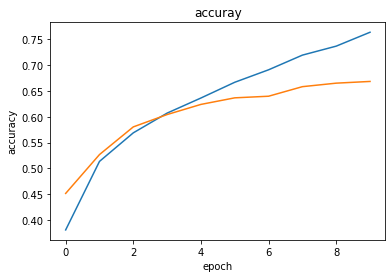

In [0]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('accuray')
plt.xlabel('epoch')
plt.ylabel('accuracy')